# 使用 scikit-learn 进行机器学习简介

**内容提要：**

本节我们介绍在整个 scikit-learn 中使用的机器学习专业词汇，并给出一个简单的学习示例。

## 机器学习：问题设定

**名词：**

- feature/attribute
- supervised learning：监督学习
    - classification：分类问题
    - regression：回归问题
- unsupervised learning：非监督学习
    - clustering：聚类
    - density estimation：密度估计
    - dimention reduction：降维
- training set：训练集
- testing set：测试集

## 载入一个示例数据集

`scikit-learn` 包含了一些标准数据集，例如：用于分类问题的 `iris` 和 `digits` 数据集；用于回归问题的 `diabetes` 数据集。

In [1]:
# 载入 iris 和 digits 数据集
from sklearn.datasets import load_iris, load_digits

iris = load_iris()
digits = load_digits()

print("digits.data:")
print(digits.data)
print("digits.target:")
print(digits.target)
print("digits.images[0]:")
print(digits.images[0])

print("digits.data.shape:", digits.data.shape)
print("digits.images.shape:", digits.images.shape)

digits.data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digits.target:
[0 1 2 ... 8 9 8]
digits.images[0]:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
digits.data.shape: (1797, 64)
digits.images.shape: (1797, 8, 8)


## 学习和预测（Learning and Predicting）

**名词：**

- fit：拟合
- predict：预测

倒数第二个样本的预测结果: [9]


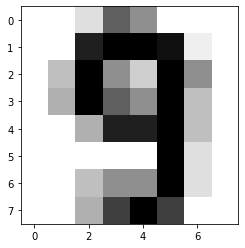

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

clf = SVC(gamma=0.001, C=100.)

# 使用除了最后一个样本的数据集来进行拟合
clf.fit(digits.data[:-1], digits.target[:-1])

# 预测数据集中的倒数第二个样本，结果应该是：9
print("倒数第二个样本的预测结果:", clf.predict(digits.data[-2:-1]))

# 把最后一个样本的图也画出来
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r)

> 在这个例子中，我们手动设置了 `gamma` 参数。要搜索参数的最佳取值，我们可以使用诸如 `grid search` 和 `cross validation` 的工具。

## 约定（Conventions）

### 数据类型

- 除非另有规定，所有的输入都被强制转换为 `float64` 类型。
- 回归问题中的 target 被转换为 `float64` 类型；分类问题中的 target 将保持原有类型。
> 在 scikit-learn 中，分类问题的 target 可以是 `string` 类型。

In [3]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
clf = SVC()

clf.fit(iris.data, iris.target)
print(clf.predict(iris.data[:3]))

clf.fit(iris.data, iris.target_names[iris.target])
print(clf.predict(iris.data[:3]))

[0 0 0]
['setosa' 'setosa' 'setosa']


### Refitting 和更新参数

估计器构建完成后，其超参数（Hyper-parameters）仍然可以通过 `set_params()` 方法进行更新。多次调用 `fit()` 时，后面的拟合结果会覆盖前面的拟合结果。

### 多类别 vs. 多标签拟合（Multiclass vs. multilabel fitting)

多分类问题有两种：multiclass classification 和 multilabel classification。

- multiclass 是指分类任务中包含不止一个类别，且每条数据仅仅对应其中一个类别，不会对应多个类别。例如：手写体数字有 10 个类别，每个图像只能归为 1 个类别。
- multilabel 是指分类任务中包含不止一个分类，且每条数据可能对应不止一个类别标签。例如：有多个新闻板块（类别），1 条新闻，可以被划分到多个板块（归为多个类别）。

无论是 multiclass，还是 multilabel，做分类时都有两种策略，一个是 `one-vs-rest（one-vs-all）`，一个是 `one-vs-one`。

在 `one-vs-all` 策略中，假设有 n 个类别，那么就会建立 n 个二项分类器，每个分类器针对其中 1（one）个类别和剩余类别（rest）进行分类。进行预测时，利用这 n 个二项分类器进行分类，得到数据属于当前类的**概率**，选择其中**概率最大**的一个类别作为最终的预测结果。

在 `one-vs-one` 策略中，同样假设有 n 个类别，则会针对两两（one-vs-one）类别建立二项分类器，得到 $k=C_n^2=\dfrac{n(n-1)}{2}$ 个分类器。对新数据进行分类时，依次使用这 k 个分类器进行分类，每次分类相当于一次投票，分类结果是哪个就相当于对哪个类投了一票。在使用全部 k 个分类器进行分类后，相当于进行了 k 次投票，选择得票最多的那个类作为最终分类结果。



> 参考文献：[one-vs-rest 与 one-vs-one 以及 sklearn 的实现](https://www.jianshu.com/p/9332fcfbd197)

In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

print("X.shape:", np.shape(X))
print("y.shape:", np.shape(y))

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y)
print(classif.predict(X))

X.shape: (5, 2)
y.shape: (5,)
[0 0 1 1 2]


上面的例子是一个 multiclass 分类问题：共有 5 个样本；每个样本有 2 个 feature；有 3 个类别，标记为 0、1、2；每个样本只有一个类别标签。

因此：`X.shape = (5, 2)`，`y.shape = (5, )`，预测结果也是一个 1d 数组。

In [5]:
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(y)
print("y.shape:", np.shape(y))
print("y:\n", y)

classif.fit(X, y)
print("predict:\n", classif.predict(X))

y.shape: (5, 3)
y:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]
predict:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]]


将上面的例子转换成 multilabel 问题求解：

- 使用 `LabelBinarizer` 将标签 `y` 转换为 2d 的二进制标签。
- multilabel 问题中，每个样本的 label 是一个数组，类似于 one-hot 编码。与 one-hot 不同的是，可能有多个 label 位置被置为 1，表示有该样本属于多个类别。
- 预测的输出同样是一个 2d 数组，其含义与 label 的含义相同。在本例中，样本 0、1、2 的预测结果正确，但是样本 3、4 的预测结果是：该样本不属于任何一类，预测错误！

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
print("y.shape:", np.shape(y))
print("y:\n", y)

classif.fit(X, y)
print("predict:\n", classif.predict(X))

y.shape: (5, 5)
y:
 [[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 1 0]
 [0 0 1 0 1]]
predict:
 [[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [1 0 1 0 0]]


实践中 multilabe 问题的标签往往并不是符合要求的 2d 数组，而是以类似 `y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]` 的形式出现：每条数据标明了每条样本对应的类标号。我们需要使用 `MultiLabelBinarizer` 将其转换为标准格式。

> `MultilabelBinarizer` 还可以用于进行 one-hot 编码

在上面 multilabel 分类问题中：共有 5 个样本（继承了前面的 X）；有 5 个类别，标记为 0、1、2、3、4；样本 1 属于 0、1 两类；样本 2 属于 0、2 两类；以此类推。

最后预测结果：

- 样本 0、1、2 的预测结果完全正确
- 样本 3 预测结果不正确，少预测了类型 3
- 样本 4 预测结果不正确，多预测了类型 0，少预测了类型 4